In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob, re

## Runs

| Name | Description | Classifier source | Model | Temperature |
| ---- | ----------- | ----------------- | ----- | ----------- |
| mistral-baseline-2023-12-23 | Baseline provided by the organizers | Baseline_LLMs_SHROOM_SemEval_2024_Task_6.ipynb (from participant kit) | mistral-7b-instruct-v0.2.Q6_K | 0.0 |
| gpt-4-baseline_v1-2024-01-09 | Baseline v1 | shroom_classifier_lcel_baseline_v1.py | gpt-4 | 0.7 |
| gpt-3.5-turbo-baseline_v1-2024-01-09 | Baseline v1 using gpt-3.5-turbo | shroom_classifier_lcel_baseline_v1.py | gpt-3.5-turbo | 0.7 |
| gpt-3.5-turbo-persona-2024-01-10 | Personas added | shroom_classifier_lcel_persona.py | gpt-3.5-turbo | 0.7 |
| gpt-3.5-turbo-persona-examples-2024-01-10 | Personas and examples added | shroom_classifier_lcel_persona_examples.py | gpt-3.5-turbo | 0.7 |
| gpt-3.5-turbo-baseline-v2-2024-01-11 | Baseline v2: tweaks, reordering of prompts in baseline v1 | shroom_classifier_lcel_baseline_v2.py | gpt-3.5-turbo | 0.7 |
| gpt-3.5-turbo-conservative-2024-01-11 | Prompting to err on side of positive classification when rationale is uncertain | shroom_classifier_lcel_conservative.py| gpt-3.5-turbo | 0.7 |
| gpt-3.5-turbo-temp-1.2-2024-01-11 | Baseline v2 with temperature = 1.2 | shroom_classifier_lcel_baseline_v2.py | gpt-3.5-turbo | 1.2 |
| gpt-3.5-turbo-temp-0.2-2024-01-11 | Baseline v2 with temperature = 0.2 | shroom_classifier_lcel_baseline_v2.py | gpt-3.5-turbo | 0.2 |
| gpt-3.5-turbo-baseline_v3-2024-01-11 | Baseline v3: Fina's revised prompt, but with existing majority voting temperature sampling approach to probability estimation | shroom_classifier_lcel_baseline_v3.py | gpt-3.5-turbo | 0.7 |
| gpt-3.5-turbo-baseline_v3_temp-1.2-2024-01-11 | Baseline v3 with temperature = 1.2 | shroom_classifier_lcel_baseline_v3.py | gpt-3.5-turbo | 0.7 |
| gpt-4-turbo-baseline_v3_temp-1.2-2024-01-12 | Baseline v3 with temperature = 1.2 using gpt-4 | shroom_classifier_lcel_baseline_v3.py | gpt-4 | 1.2 |



In [2]:
records = []
for score_filename in glob.glob('scores/*.txt'):
    record = {}
    score_file = open(score_filename, 'r')
    run = re.match('scores/score-(.+).txt', score_filename).group(1)
    record["run"] = run
    for score in score_file.readlines():
        pair = score.strip().split(':')
        record[pair[0]] = float(pair[1])
    records.append(record)


In [3]:
df = pd.DataFrame.from_records(records)

df["date"] = df["run"].apply(lambda x: x[-10:])
df["version"] = df["run"].apply(lambda x: x[:-11])
df["avg_acc"] = (df["agnostic_acc"] + df["aware_acc"]) / 2.
df["avg_rho"] = (df["agnostic_rho"] + df["aware_rho"]) / 2.

df_for_table = df[[ 'version', 'date', 'agnostic_acc', 'agnostic_rho', 'aware_acc', 'aware_rho', "avg_acc", "avg_rho" ]].sort_values(by='date')

# Define the styling function
def highlight_max(s):
    is_max = s == s.max()
    return ['font-weight: bold' if v else '' for v in is_max]

# Apply the styling to the DataFrame
styled_df = df_for_table.style.apply(highlight_max, subset=['agnostic_acc', 'agnostic_rho', 'aware_acc', 'aware_rho', 'avg_acc', 'avg_rho'])

# Display the styled DataFrame
styled_df


,version,date,agnostic_acc,agnostic_rho,aware_acc,aware_rho,avg_acc,avg_rho
11,mistral-baseline,2023-12-23,0.649299,0.380141,0.706587,0.460958,0.677943,0.420549
1,gpt-4-baseline_v1,2024-01-09,0.801603,0.679521,0.762475,0.555941,0.782039,0.617731
3,gpt-3.5-turbo-baseline_v1,2024-01-09,0.725451,0.549040,0.712575,0.541777,0.719013,0.545408
6,gpt-3.5-turbo-persona-examples,2024-01-10,0.671343,0.493688,0.712575,0.524608,0.691959,0.509148
10,gpt-3.5-turbo-persona,2024-01-10,0.715431,0.575568,0.720559,0.535034,0.717995,0.555301
0,gpt-3.5-turbo-conservative,2024-01-11,0.701403,0.540491,0.734531,0.568859,0.717967,0.554675
4,gpt-3.5-turbo-baseline-v2,2024-01-11,0.701403,0.526440,0.742515,0.569994,0.721959,0.548217
5,gpt-3.5-turbo-temp-1.2,2024-01-11,0.709419,0.519809,0.752495,0.582654,0.730957,0.551231
7,gpt-3.5-turbo-baseline_v3,2024-01-11,0.745491,0.584922,0.718563,0.508341,0.732027,0.546631
8,gpt-3.5-turbo-temp-0.2,2024-01-11,0.711423,0.488756,0.742515,0.528502,0.726969,0.508629


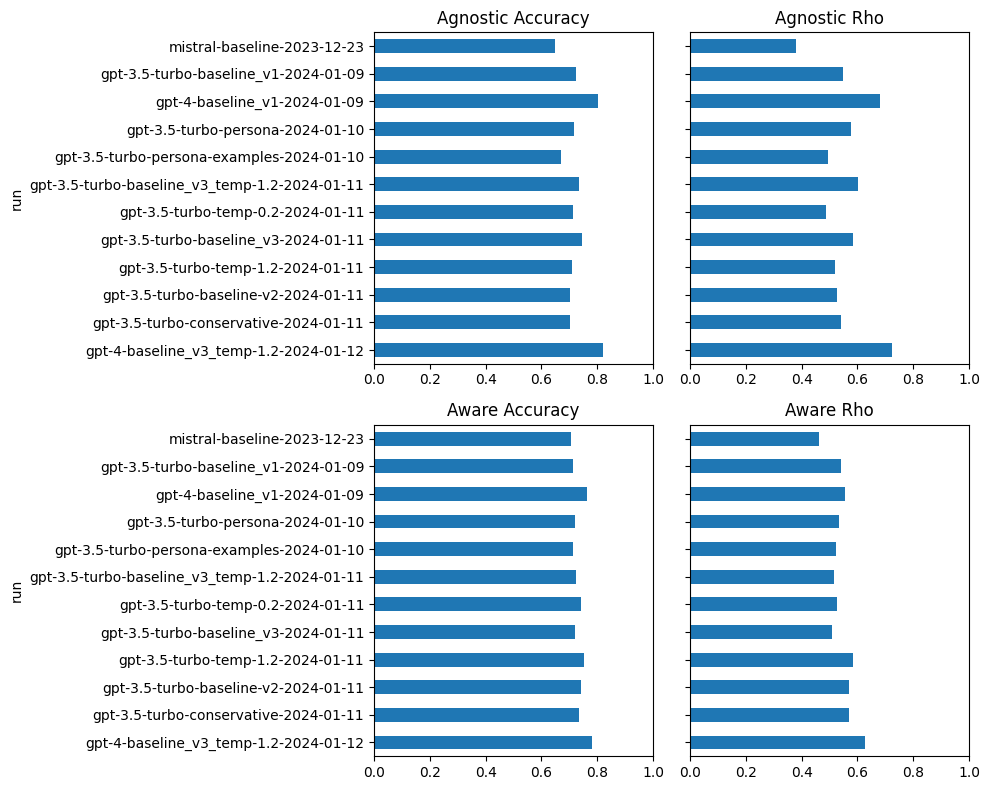

In [4]:
df_agnostic_acc = df[['run', 'date', 'agnostic_acc']].sort_values(by='date', ascending=False)
df_agnostic_rho = df[['run', 'date', 'agnostic_rho']].sort_values(by='date', ascending=False)
df_aware_acc = df[['run', 'date', 'aware_acc']].sort_values(by='date', ascending=False)
df_aware_rho = df[['run', 'date', 'aware_rho']].sort_values(by='date', ascending=False)

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plotting each DataFrame on a specific subplot
df_agnostic_acc.plot(kind='barh', x='run', legend=False, ax=axs[0, 0])
axs[0, 0].set_title('Agnostic Accuracy')
axs[0, 0].set_xlim(0, 1)

df_agnostic_rho.plot(kind='barh', legend=False, ax=axs[0, 1])
axs[0, 1].set_title('Agnostic Rho')
axs[0, 1].set_yticklabels([])
axs[0, 1].set_xlim(0, 1)

df_aware_acc.plot(kind='barh', x='run', legend=False, ax=axs[1, 0])
axs[1, 0].set_title('Aware Accuracy')
axs[1, 0].set_xlim(0, 1)

df_aware_rho.plot(kind='barh', legend=False, ax=axs[1, 1])
axs[1, 1].set_title('Aware Rho')
axs[1, 1].set_yticklabels([])
axs[1, 1].set_xlim(0, 1)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
